In [1]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline


np.set_printoptions(formatter={'float_kind':'{:f}'.format})


sns.set(rc={'figure.figsize':(5,5)})


pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
raw_data = pd.read_csv('car.csv')


print(raw_data.shape)


raw_data.head()

(205, 27)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  Price prediction  
0          27  13495.0               NaN  
1          27  16500.0               NaN  
2          26  16500.0               NaN  
3          30  13950.0               NaN  
4          22  17450.0               NaN

In [4]:


for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 -- [-2 -1  0  1  2  3]
The number of values for feature CarName :147
The number of values for feature fueltype :2 -- ['diesel' 'gas']
The number of values for feature aspiration :2 -- ['std' 'turbo']
The number of values for feature doornumber :2 -- ['four' 'two']
The number of values for feature carbody :5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 -- ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 -- ['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 -- ['eight' 'fiv

In [5]:
raw_data.isnull().sum()

car_ID                0
symboling             0
CarName               0
fueltype              0
aspiration            0
doornumber            0
carbody               0
drivewheel            0
enginelocation        0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginetype            0
cylindernumber        0
enginesize            0
fuelsystem            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
Price prediction    205
dtype: int64

In [6]:
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan


raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()

raw_data.head(10)

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\1004129293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[0] = np.nan
C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\1004129293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[1] = np.nan
C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\1004129293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[2

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   
5        sedan        fwd          front       99.8      177.3      66.3   
6        sedan        fwd          front      105.8      192.7      71.4   
7        wagon        fwd          front      105.8      192.7      71.4   
8        sedan        fwd          front      105.8      192.7      71.4   
9    hatchback        4wd          front       99.5      178.2      67.9   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   
5       53.1        2507        ohc           five         136       mpfi   
6       55.7        2844        ohc           five         136       mpfi   
7       55.7        2954        ohc           five         136       mpfi   
8       55.9        3086        ohc           five         131       mpfi   
9       52.0        3053        ohc           five         131       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   
5       3.19    3.40               8.5         110     5500       19   
6       3.19    3.40               8.5         110     5500       19   
7       3.19    3.40               8.5         110     5500       19   
8       3.13    3.40               8.3         140     5500       17   
9       3.13    3.40               7.0         160     5500       16   

   highwaympg      price  Price prediction       price 2  
0          27  13495.000               NaN  13243.716173  
1          27  16500.000               NaN  13243.716173  
2          26  16500.000               NaN  13243.716173  
3          30  13950.000               NaN  13950.000000  
4          22  17450.000               NaN  17450.000000  
5          25  15250.000               NaN  15250.000000  
6          25  17710.000               NaN  17710.000000  
7          25  18920.000               NaN  18920.000000  
8          20  23875.000               NaN  23875.000000  
9          22  17859.167               NaN 

In [7]:
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan


#raw_data = raw_data.dropna(subset = ['price 2'])


raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()


del raw_data['price 2']

raw_data.head()

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3143540756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[0] = np.nan
C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3143540756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[1] = np.nan
C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3143540756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[2

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  Price prediction  
0          27  13495.0               NaN  
1          27  16500.0               NaN  
2          26  16500.0               NaN  
3          30  13950.0               NaN  
4          22  17450.0               NaN

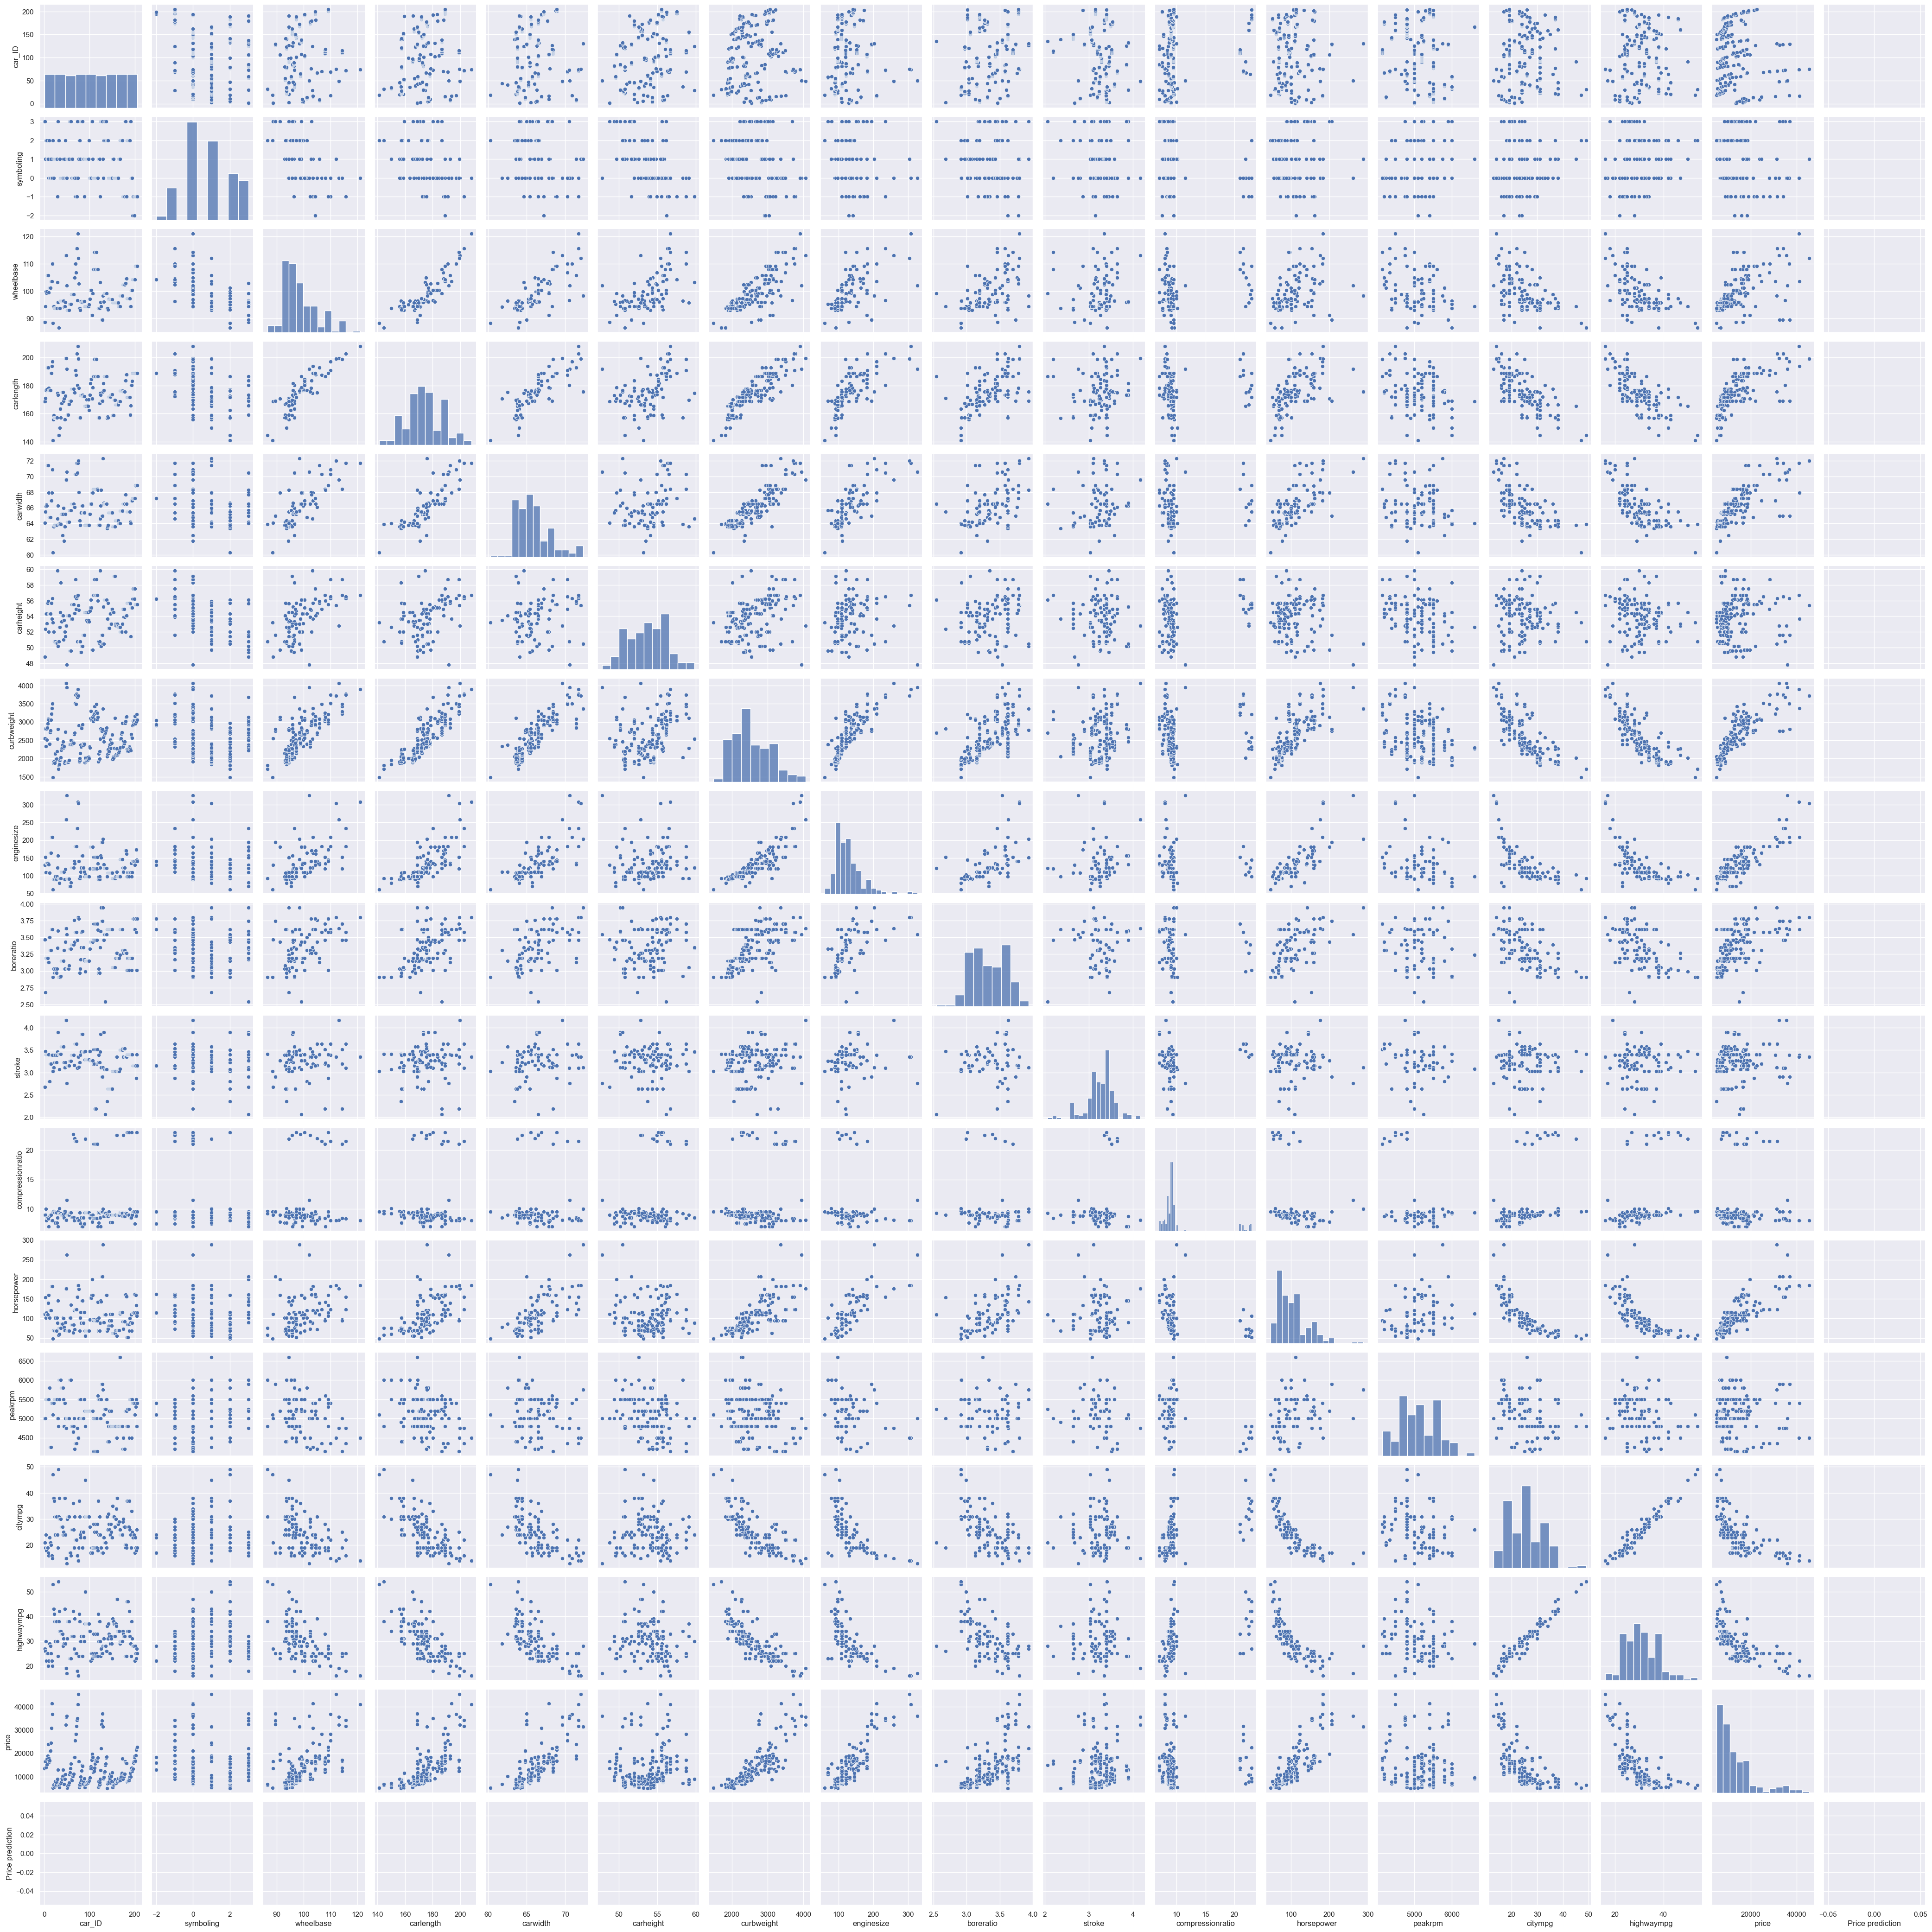

In [8]:
g = sns.pairplot(raw_data)

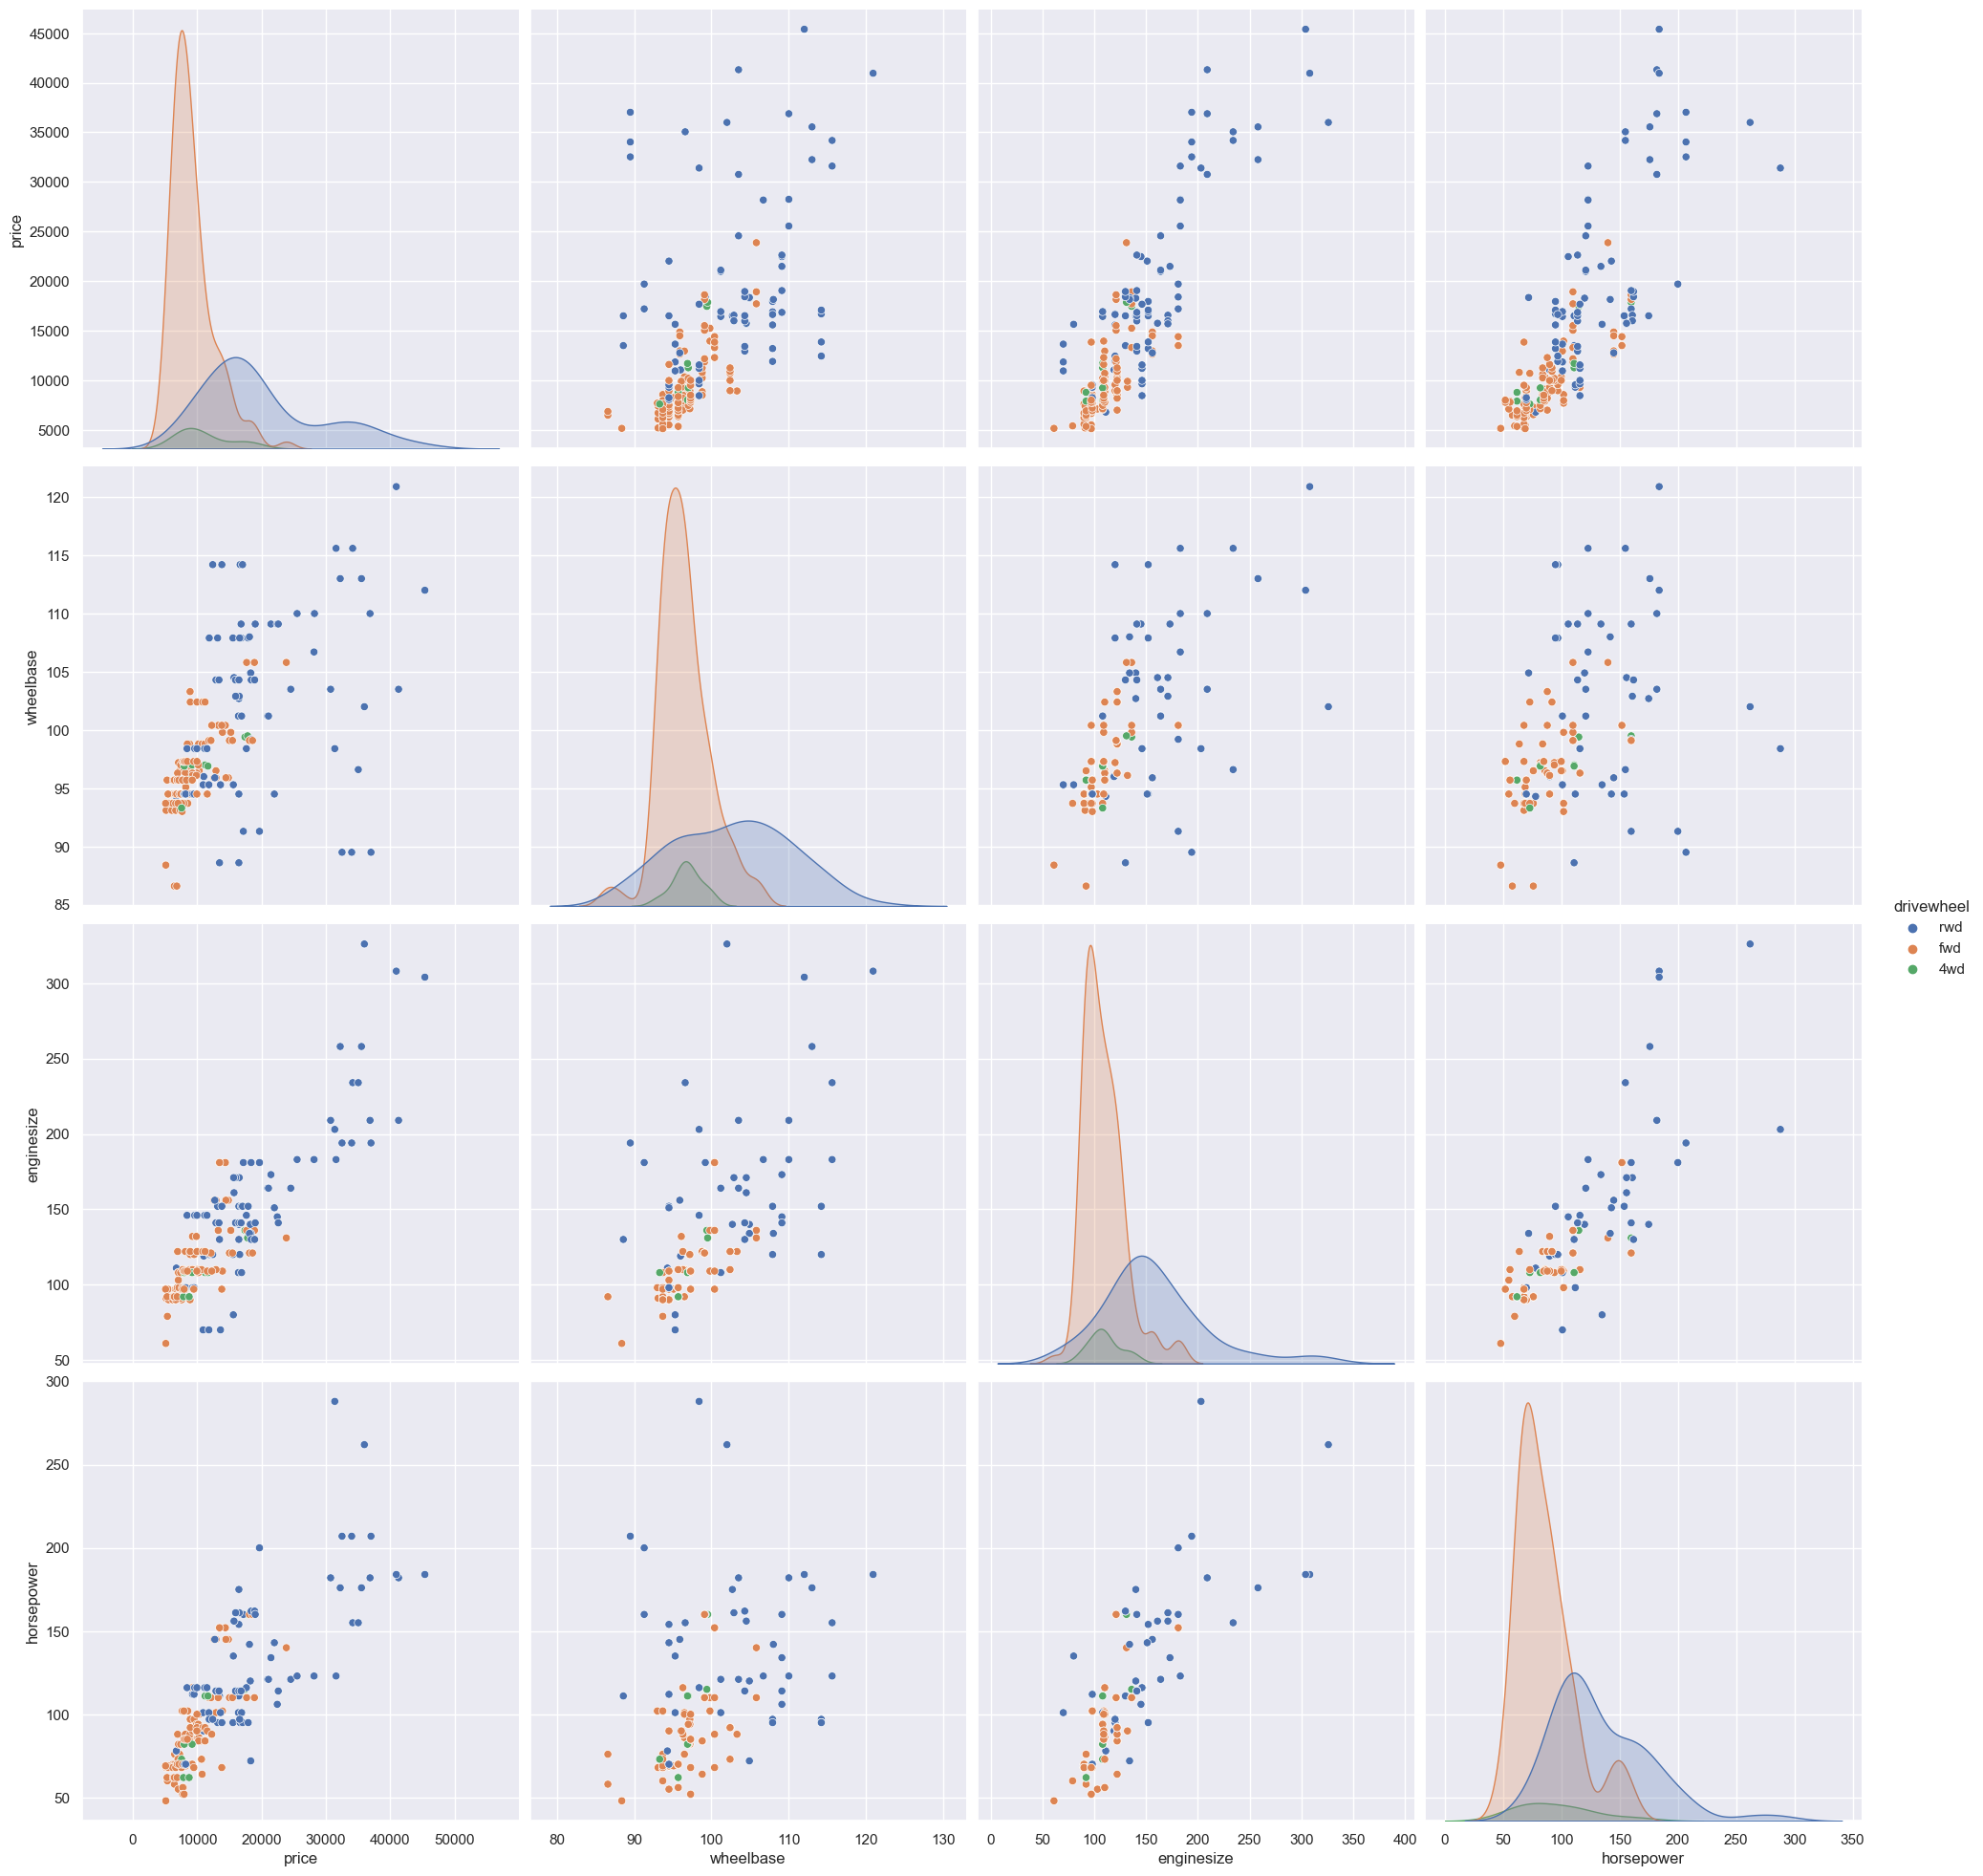

In [9]:
g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5)

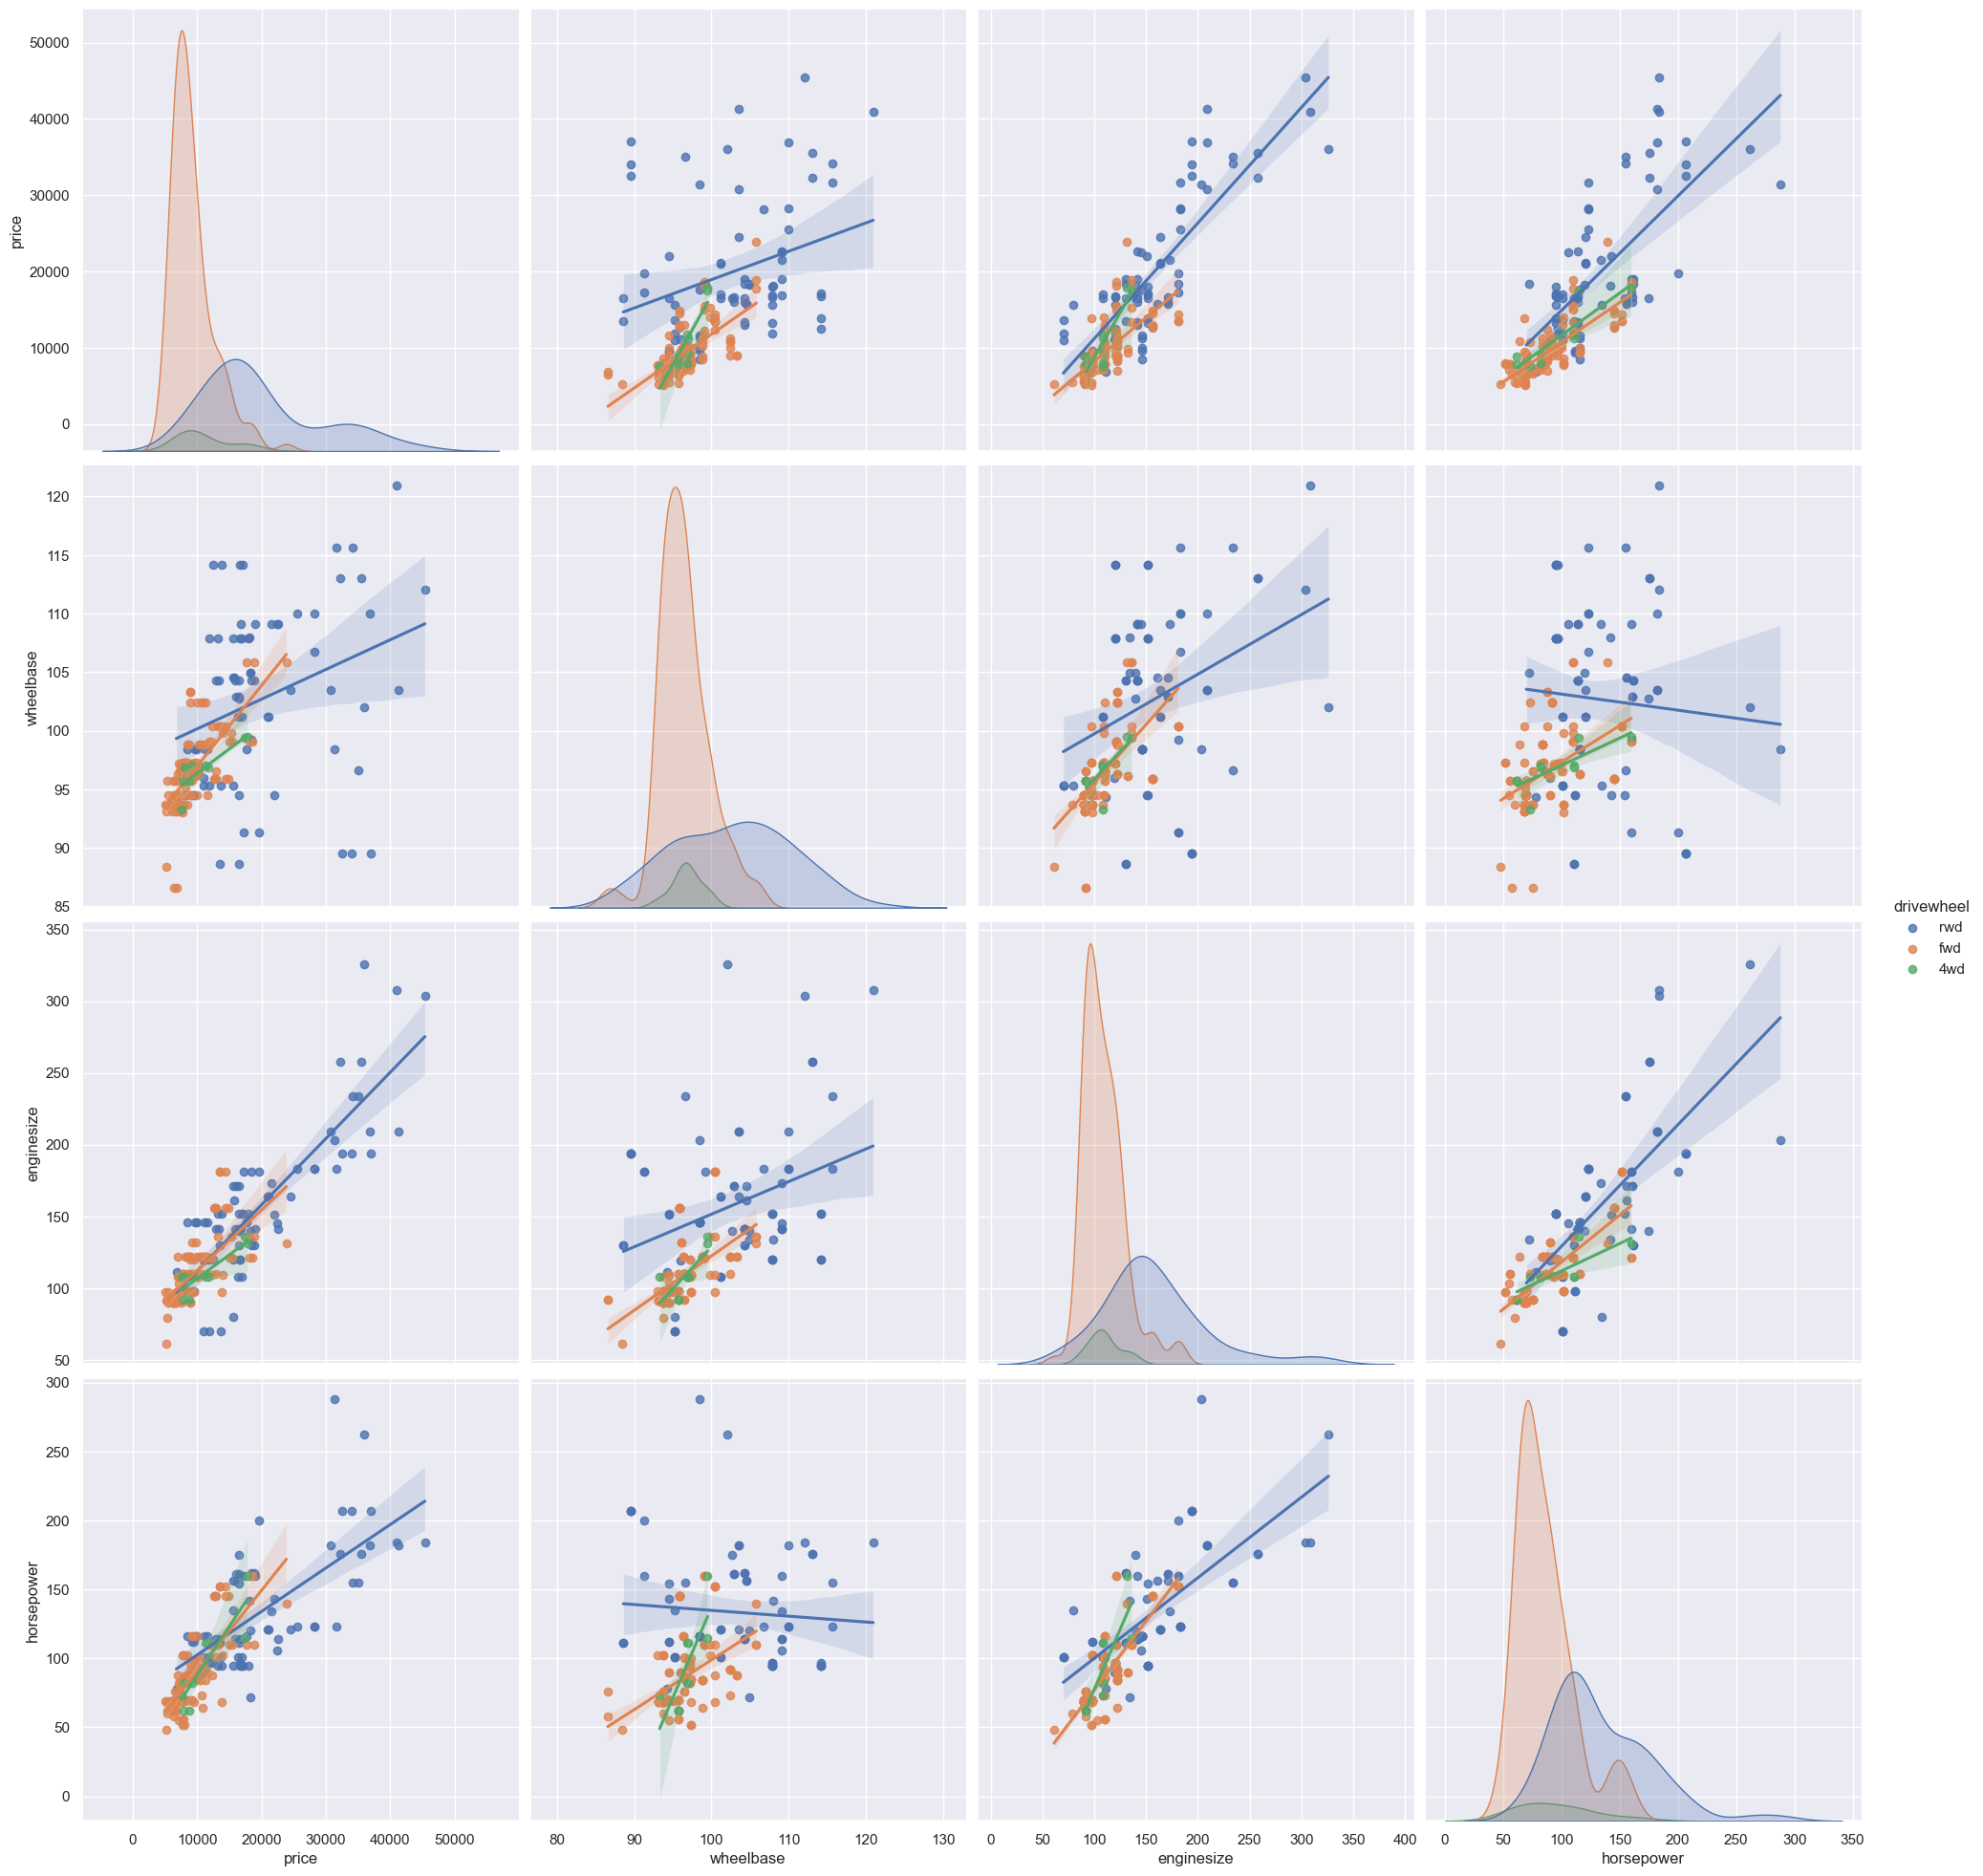

In [10]:
g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5, kind="reg")

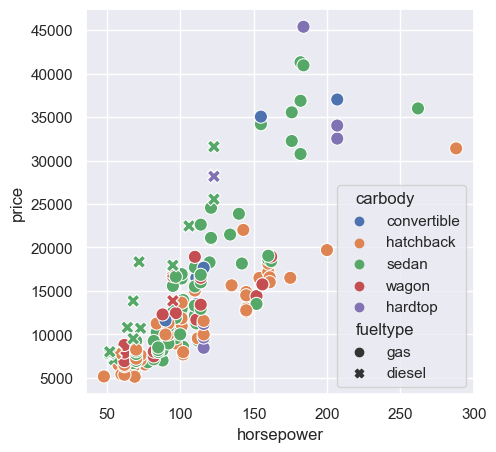

In [11]:
ax = sns.scatterplot(x="horsepower", y="price", data=raw_data, hue = 'carbody', style = 'fueltype', s=90)

carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

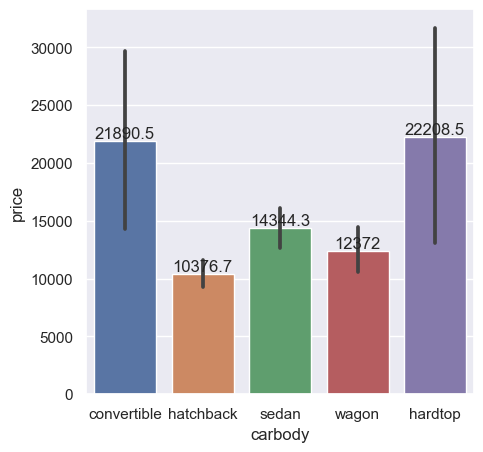

In [12]:
ax = sns.barplot(x="carbody", y="price", data=raw_data)
ax.bar_label(ax.containers[0])



raw_data[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

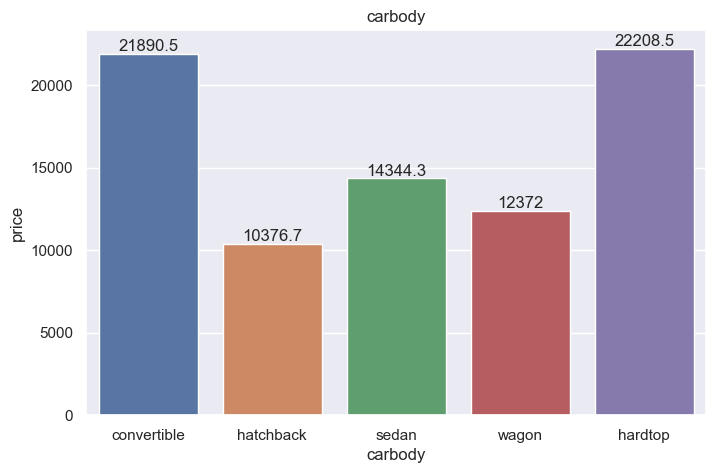

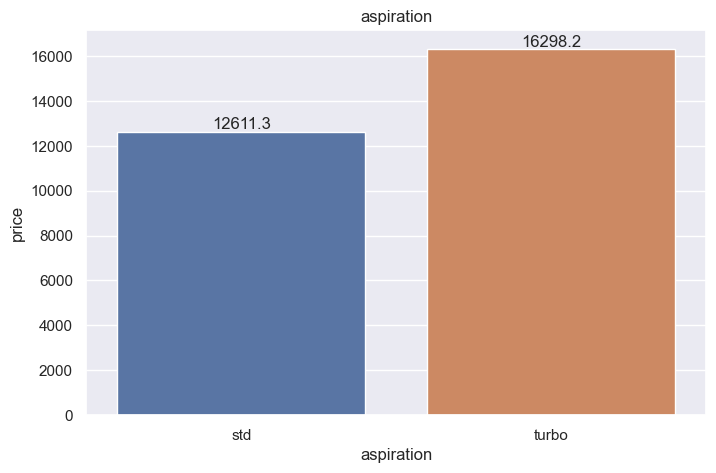

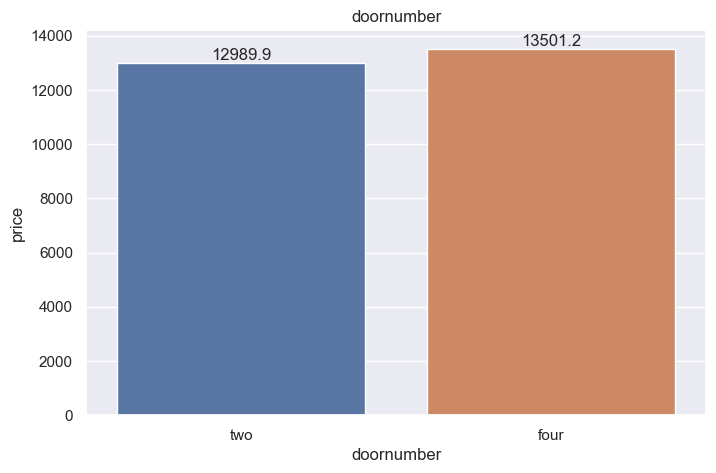

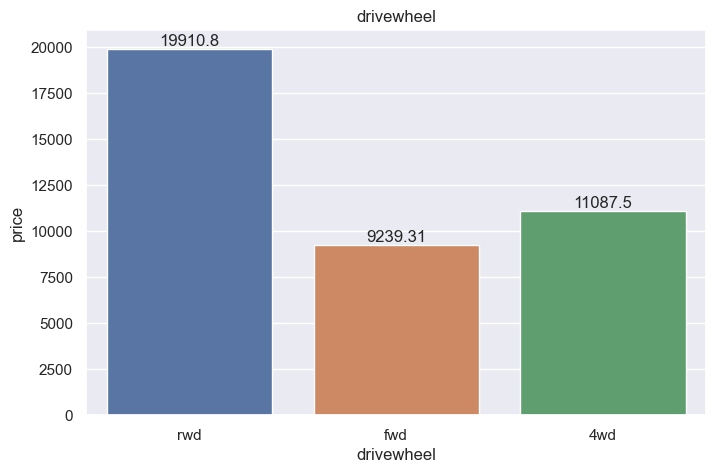

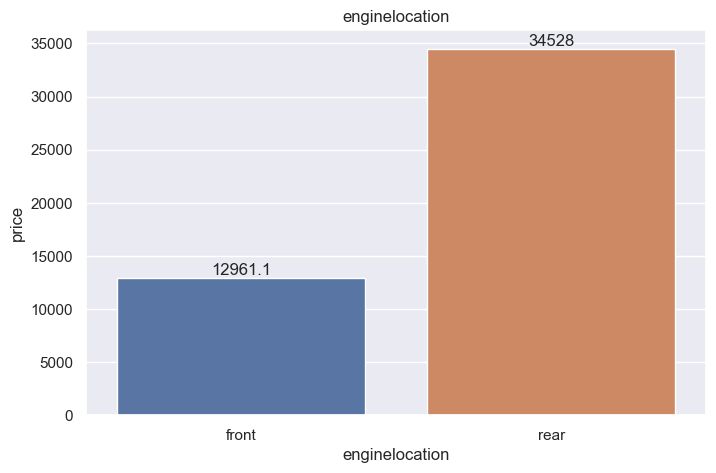

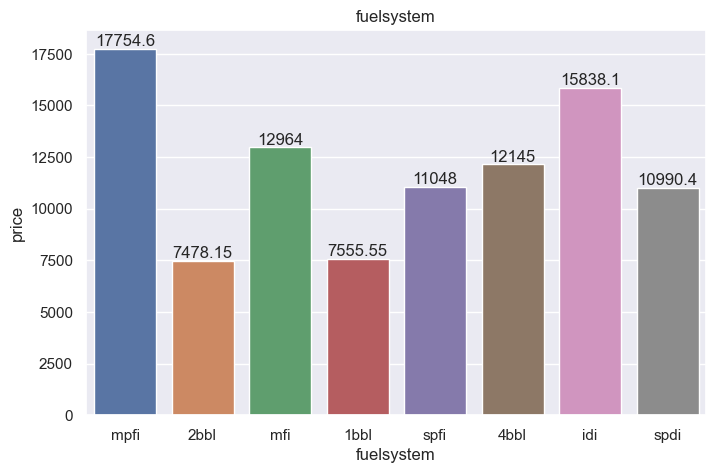

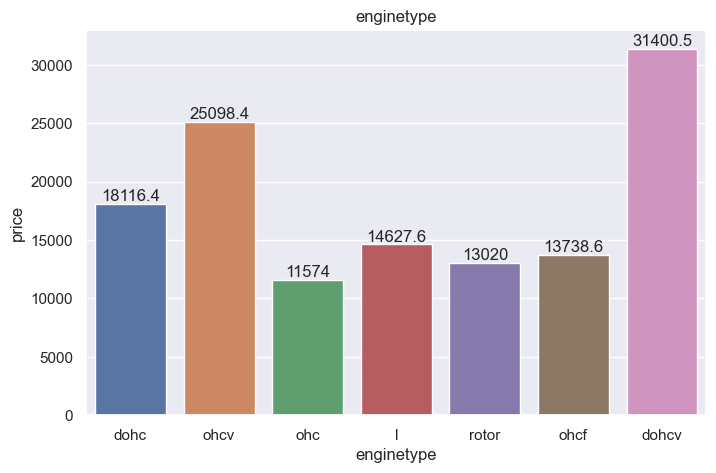

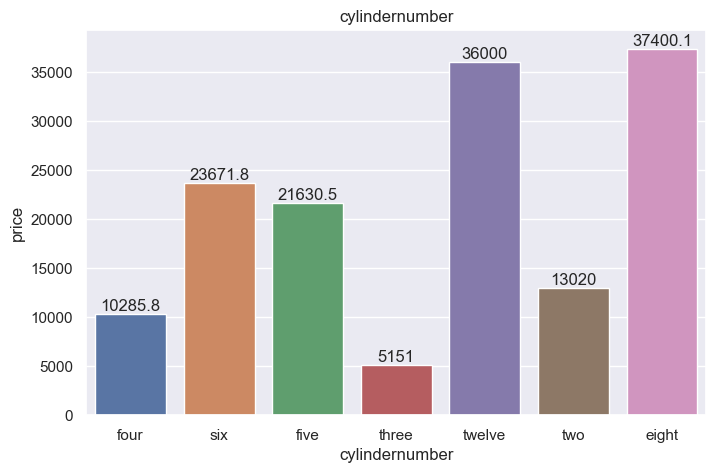

In [14]:
categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']


sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    
    ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\2207188364.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


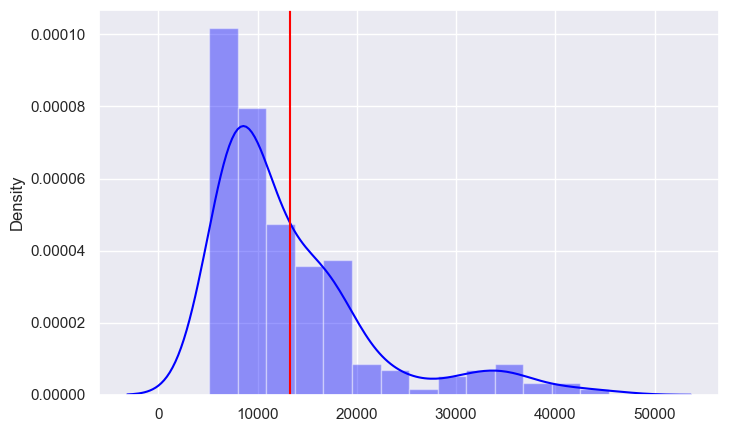

In [15]:
x = raw_data['price'].values

sns.distplot(x, color = 'blue');


mean = raw_data['price'].mean()


plt.axvline(mean, 0,1, color = 'red')

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


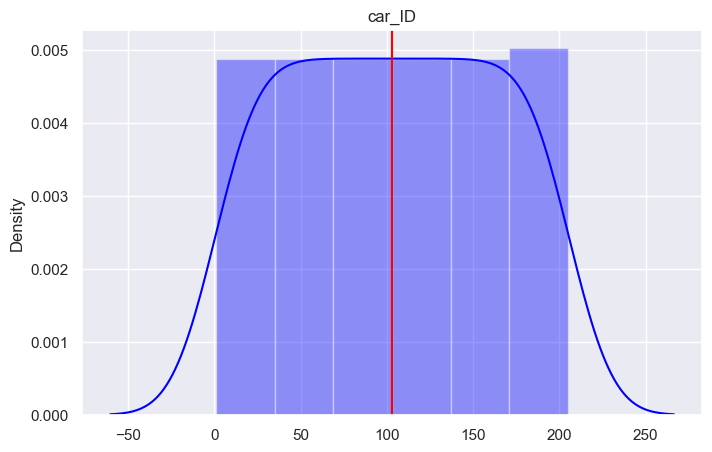

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


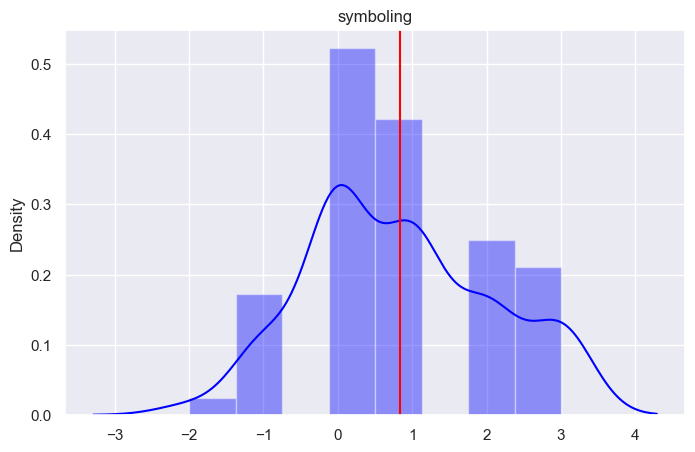

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


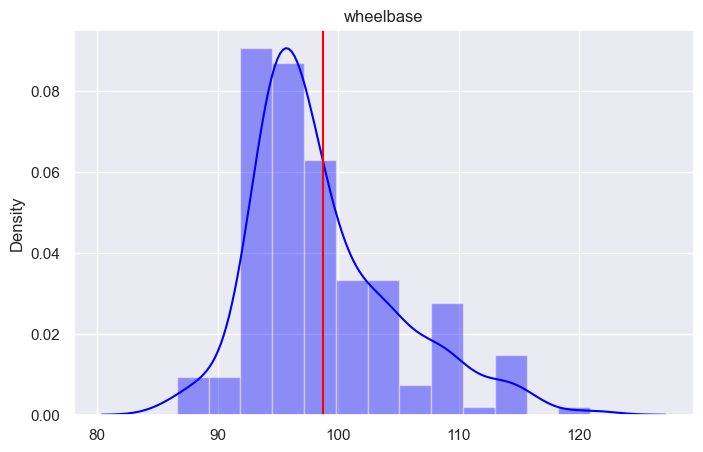

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


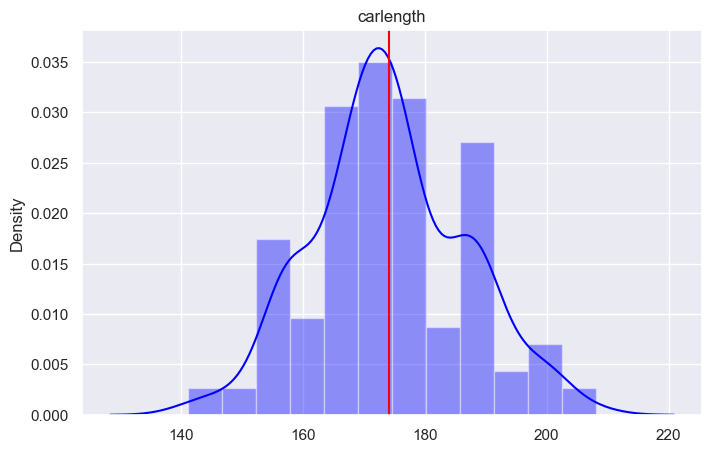

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


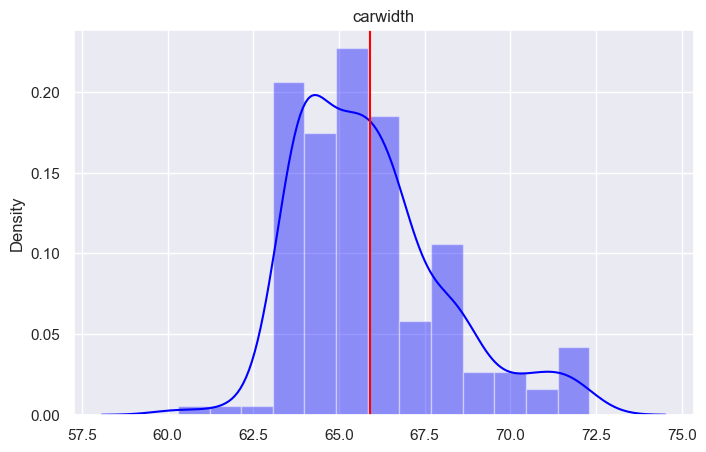

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


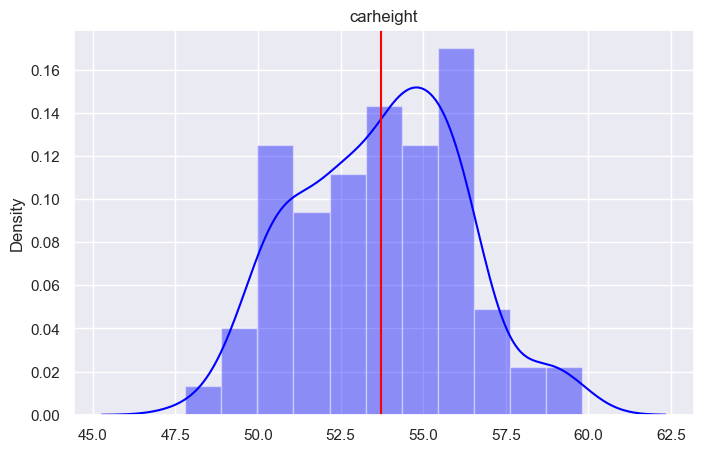

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


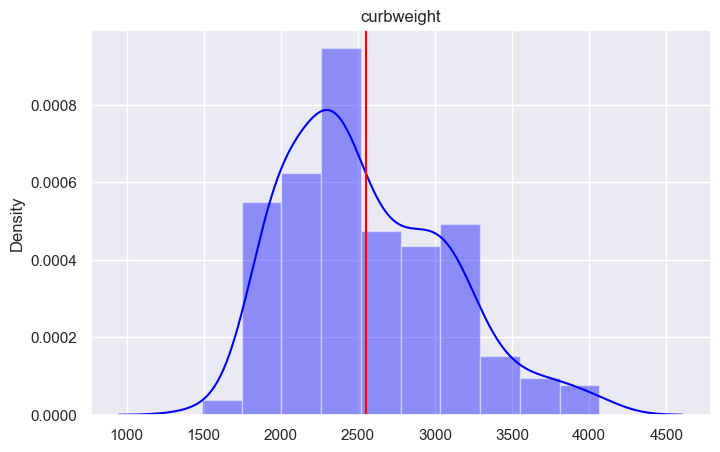

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


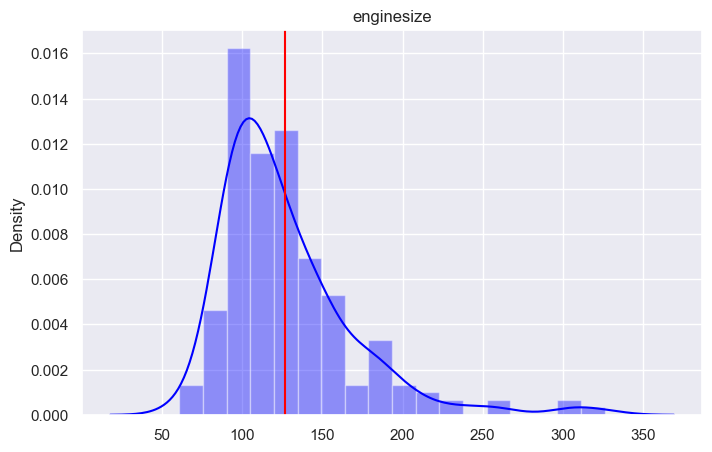

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


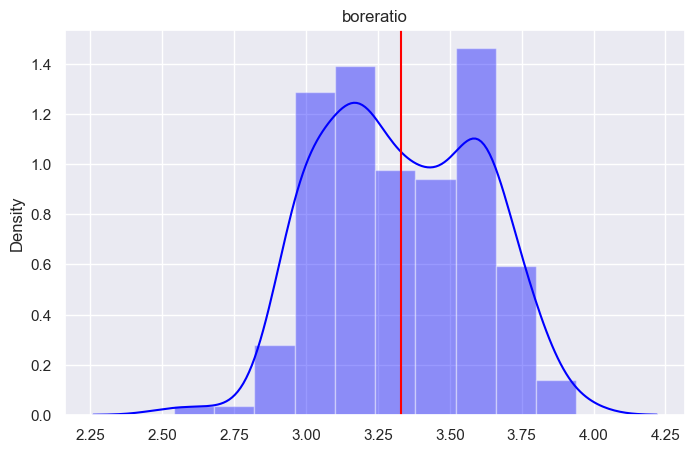

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


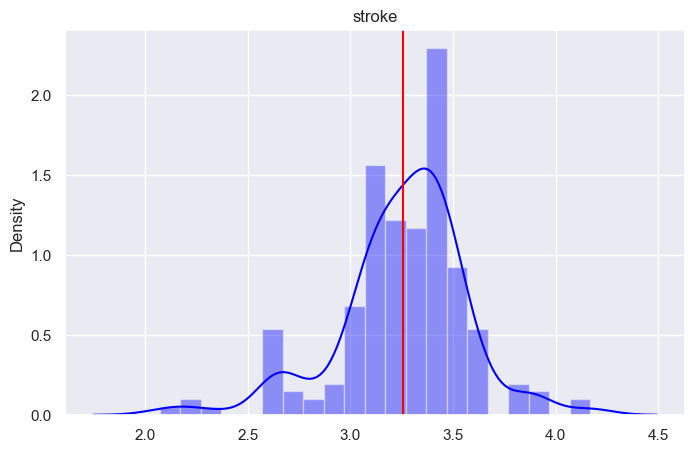

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


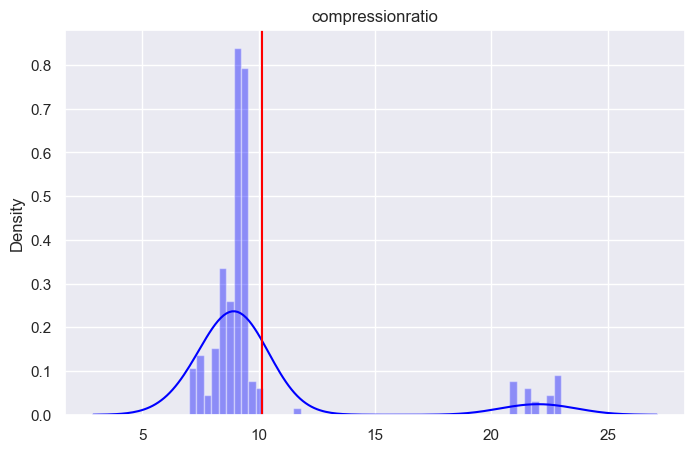

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


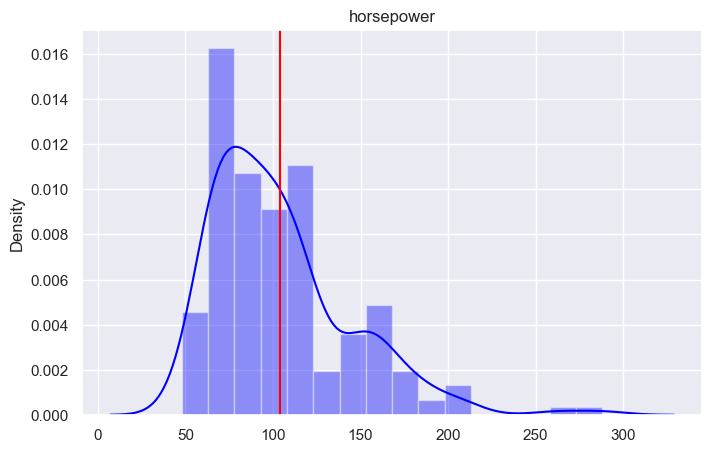

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


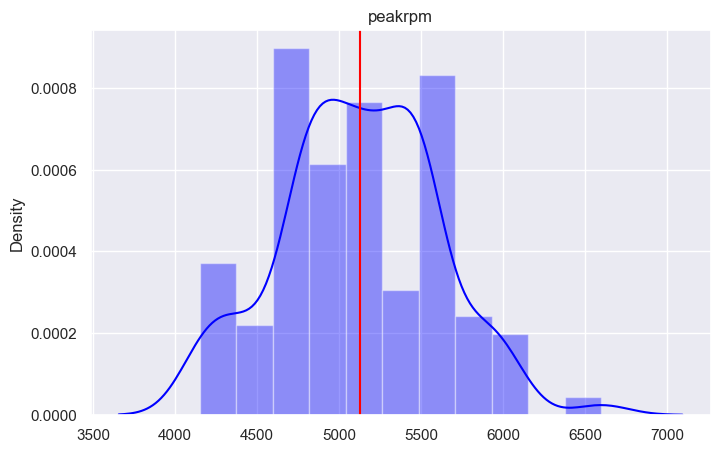

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


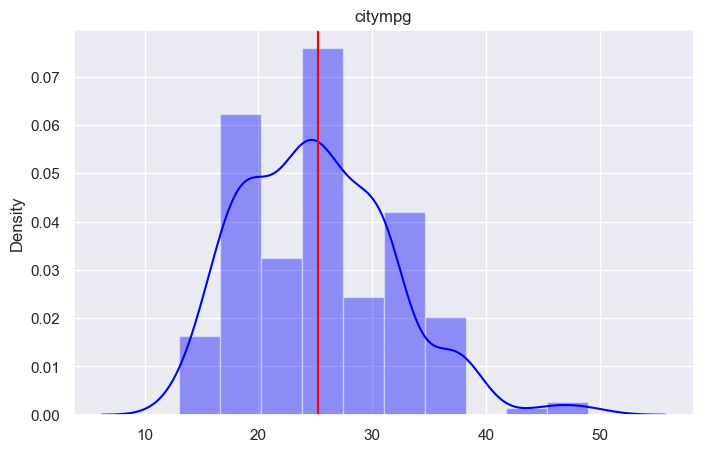

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


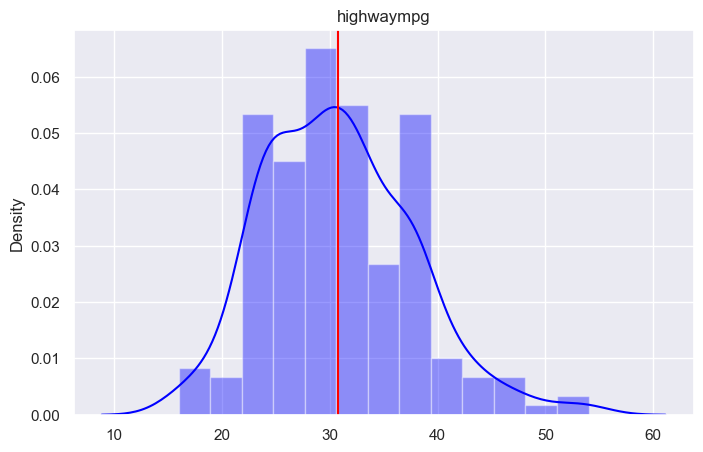

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


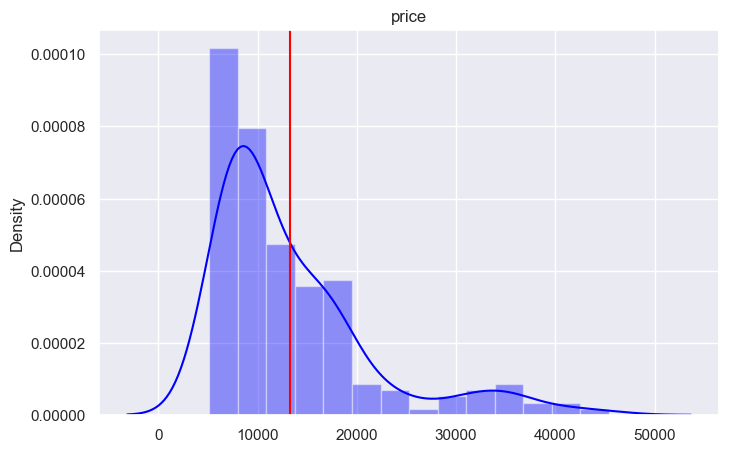

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3694236430.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');
C:\Users\manoj\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


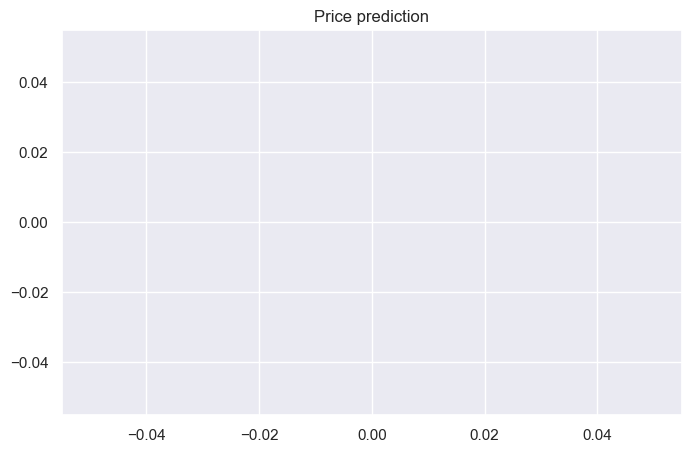

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns


sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    
    mean = raw_data[n].mean()

    
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [17]:
n_variables

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Price prediction'],
      dtype='object')

The meadian is:  10295.0


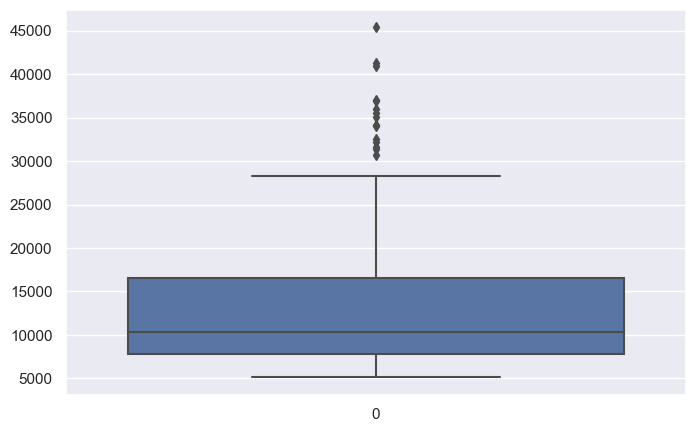

In [18]:
x = raw_data['price'].values
ax = sns.boxplot(x)

print('The meadian is: ', raw_data['price'].median())



The meadian is:  103.0


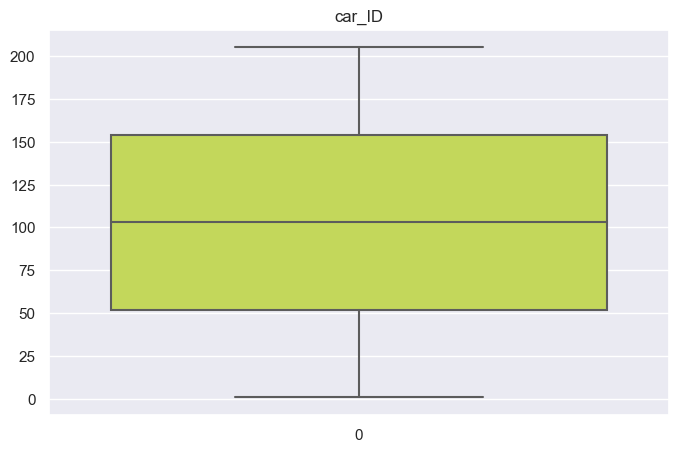

The meadian is:  1.0


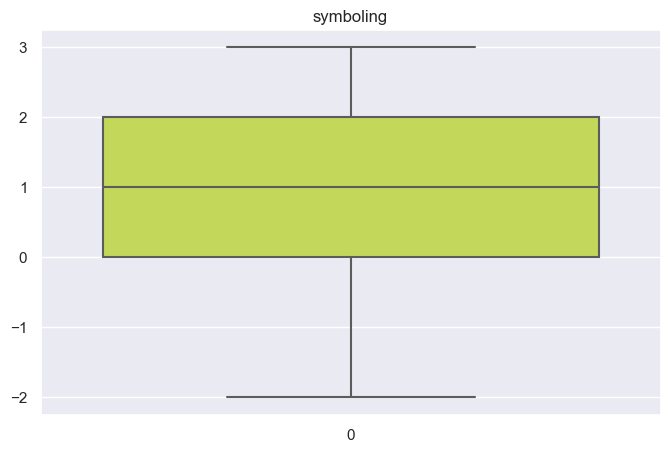

The meadian is:  97.0


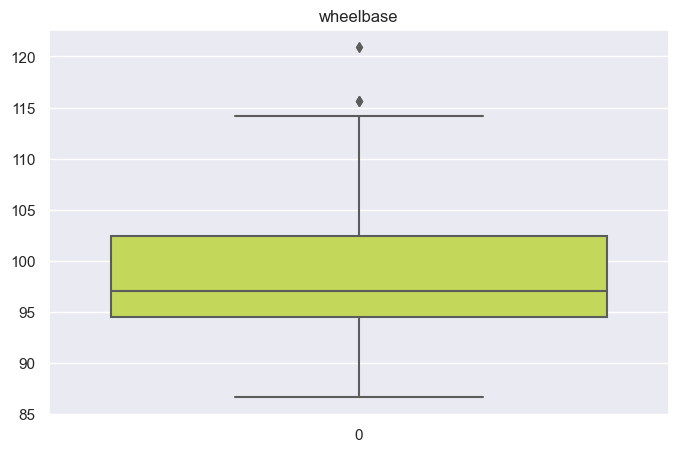

The meadian is:  173.2


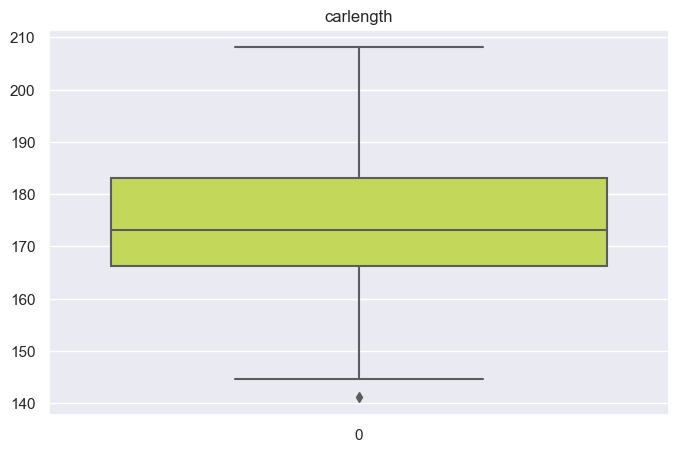

The meadian is:  65.5


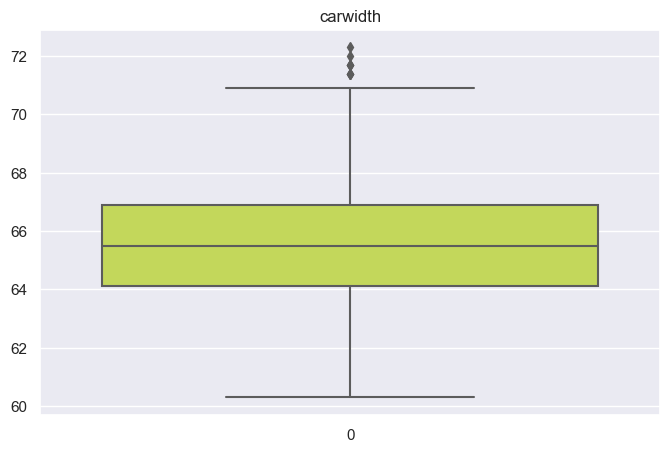

The meadian is:  54.1


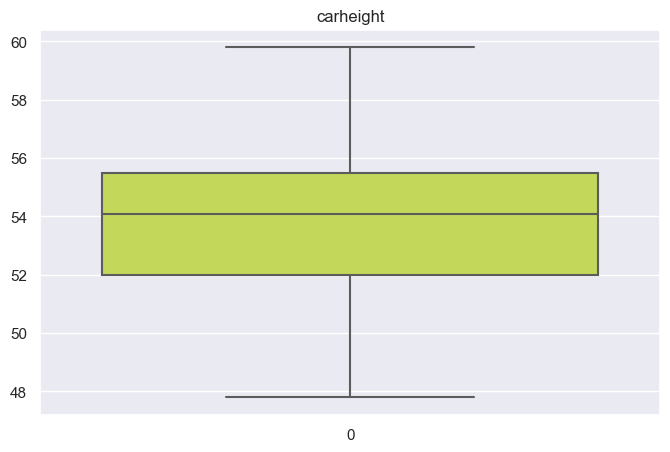

The meadian is:  2414.0


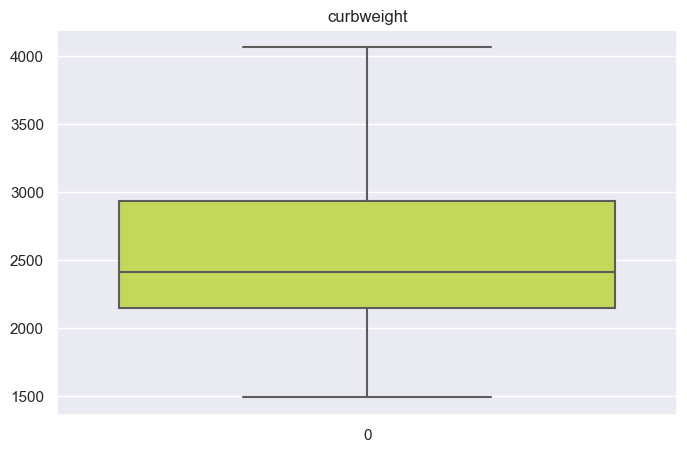

The meadian is:  120.0


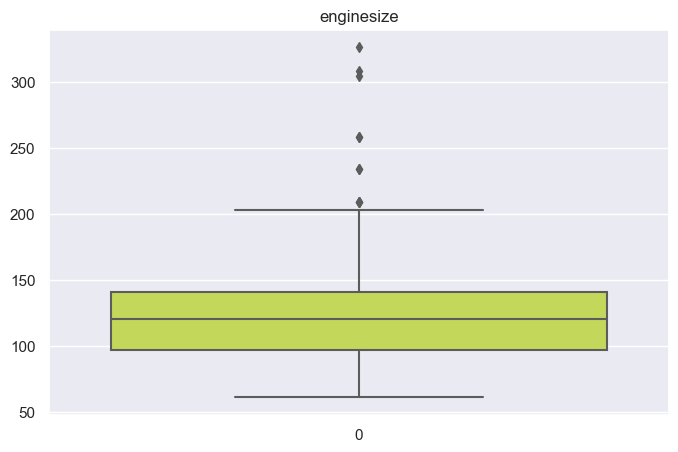

The meadian is:  3.31


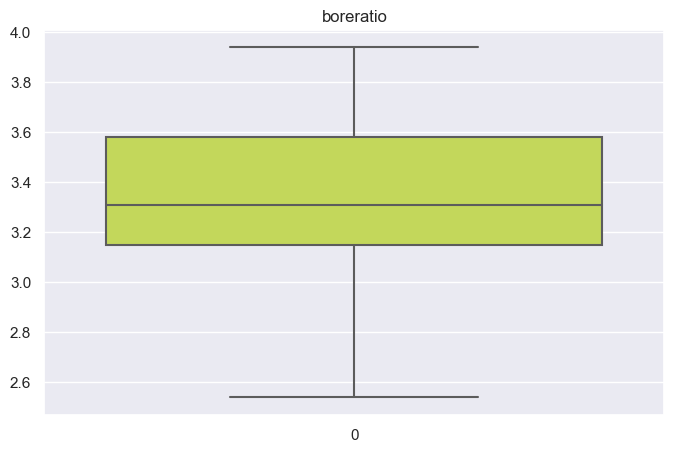

The meadian is:  3.29


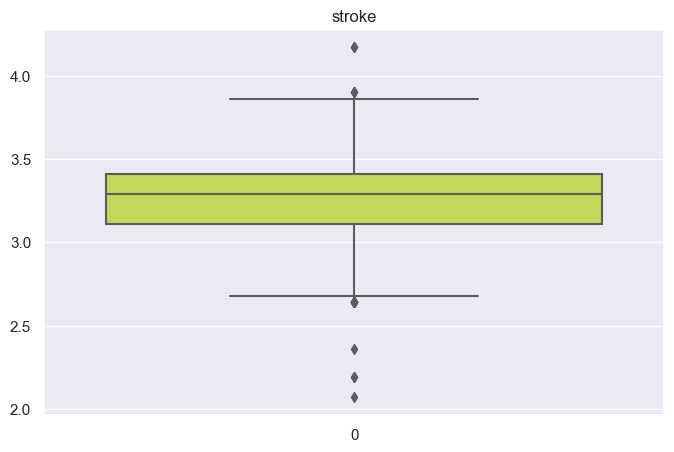

The meadian is:  9.0


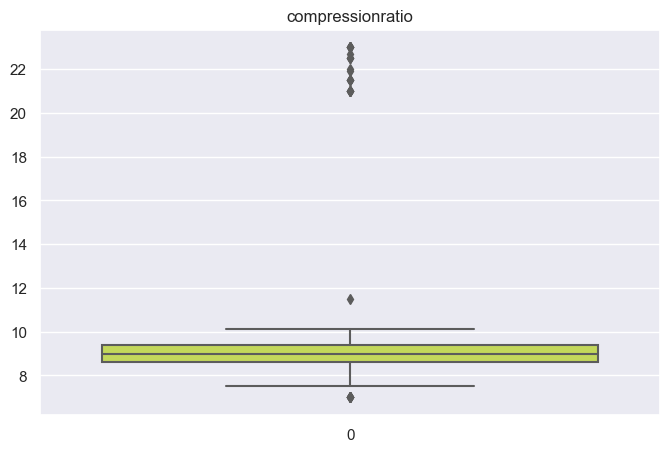

The meadian is:  95.0


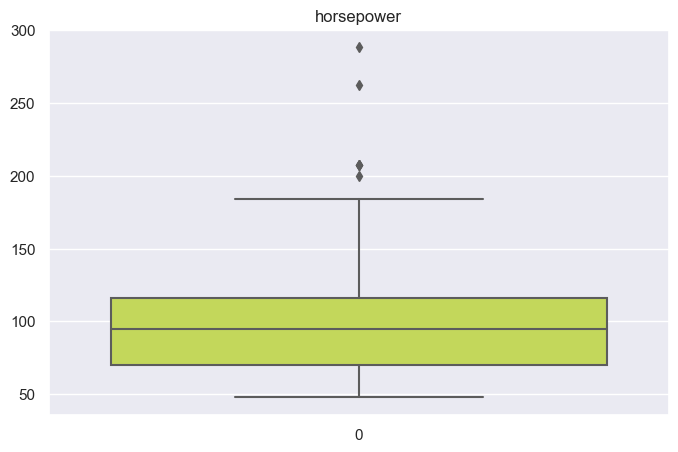

The meadian is:  5200.0


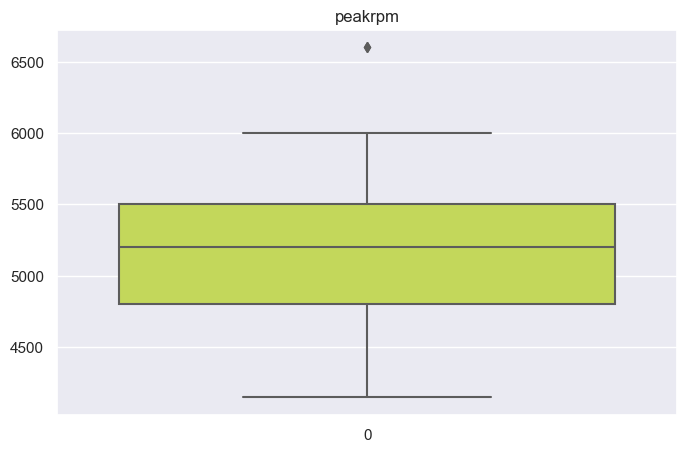

The meadian is:  24.0


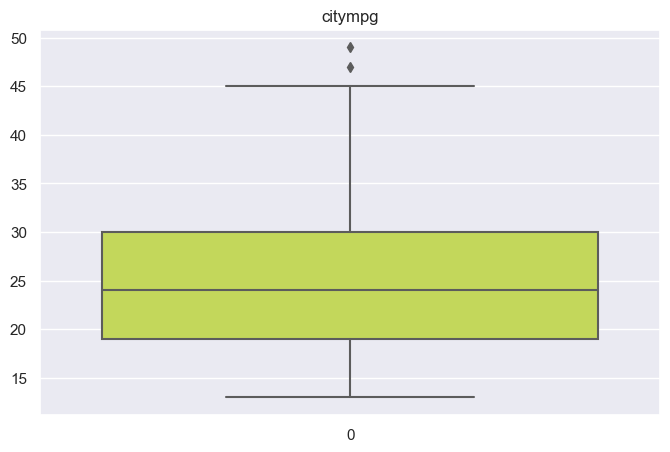

The meadian is:  30.0


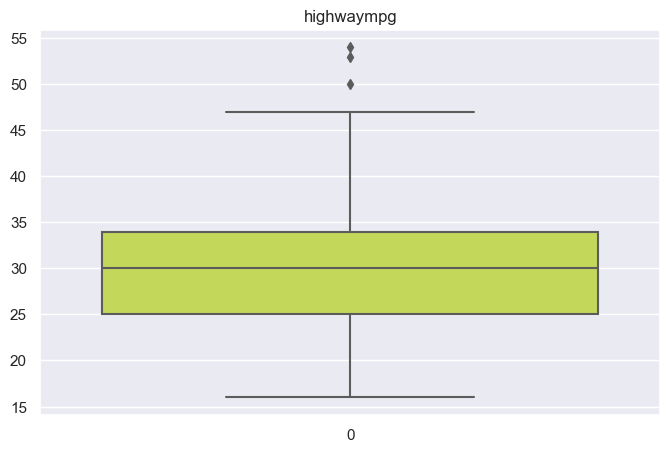

The meadian is:  10295.0


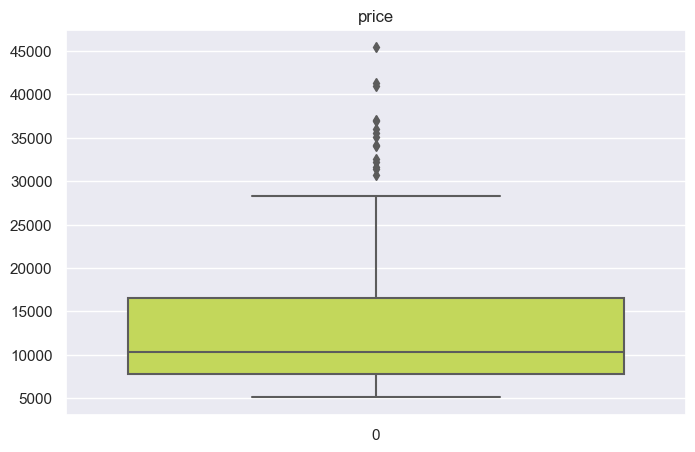

The meadian is:  nan


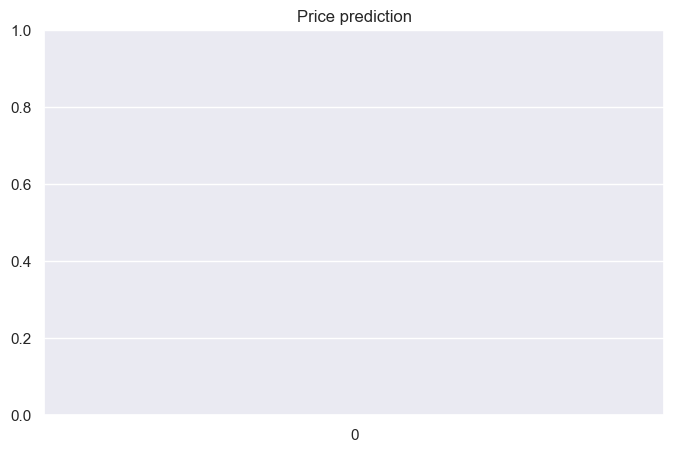

In [19]:
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

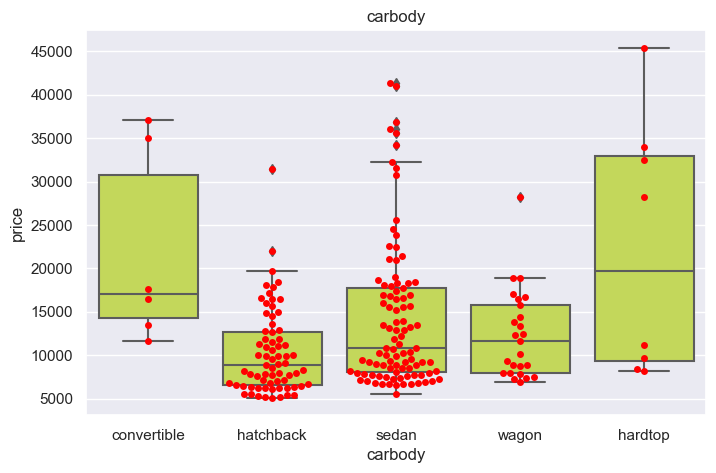

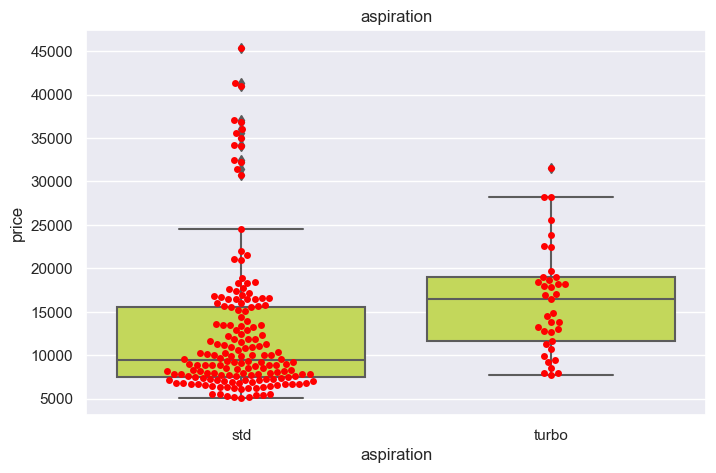

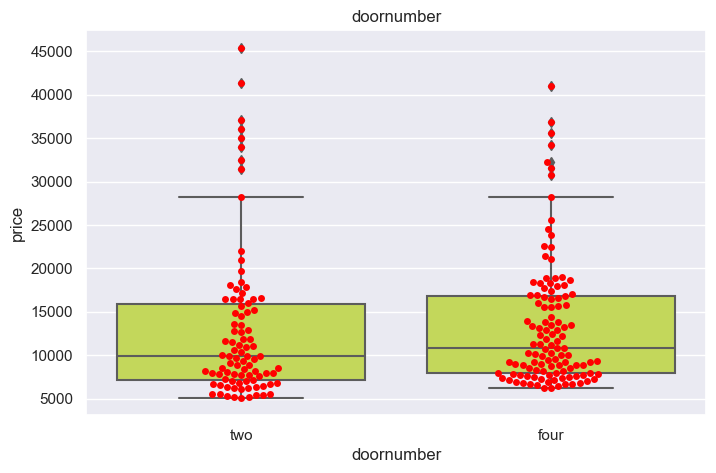

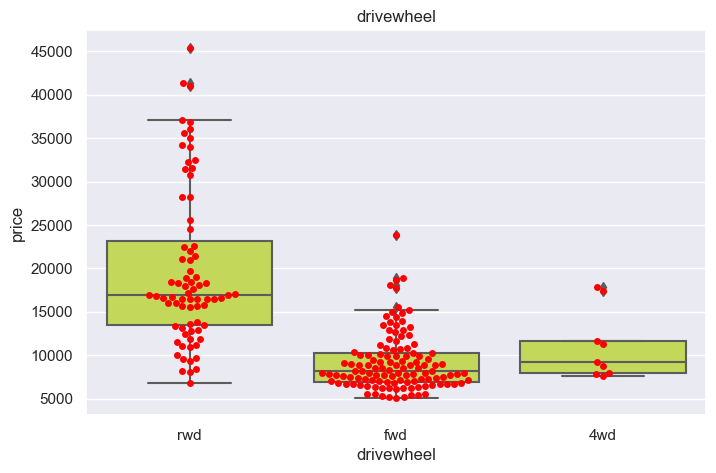

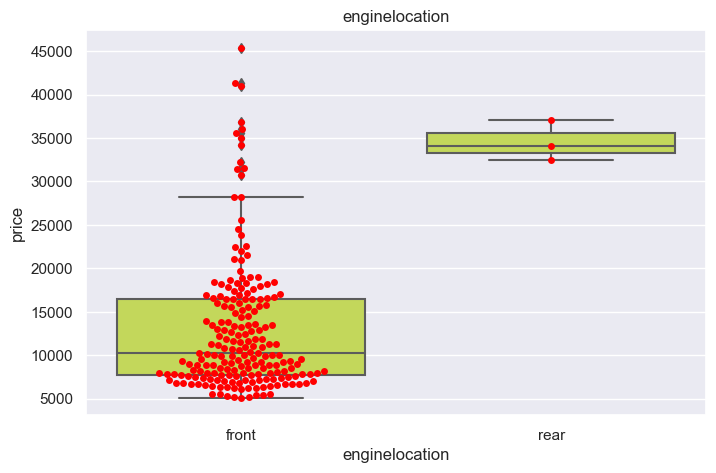

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


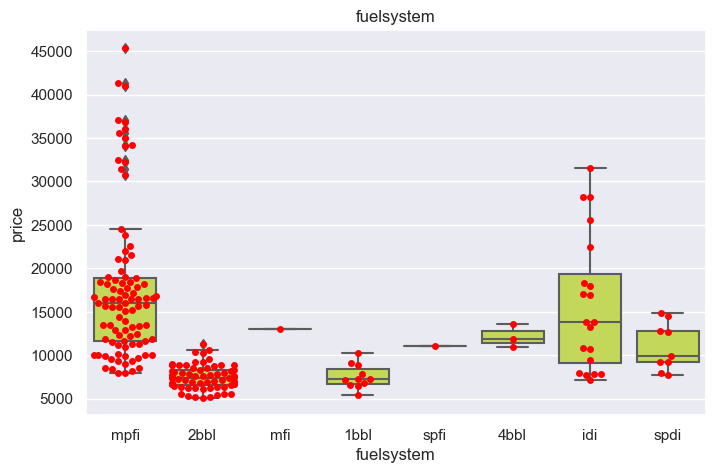

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


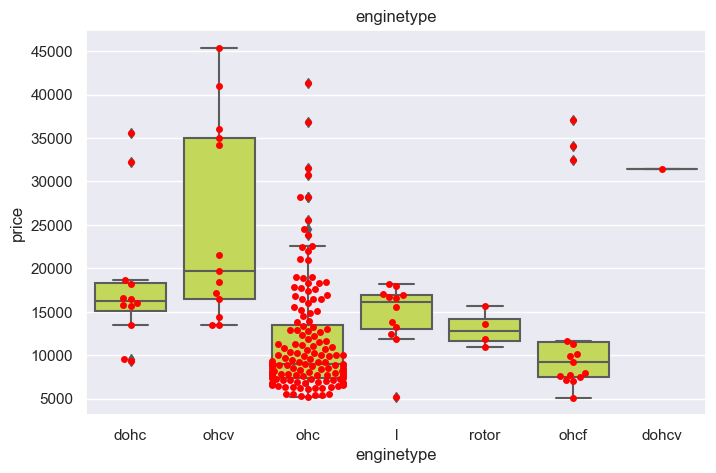

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\manoj\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


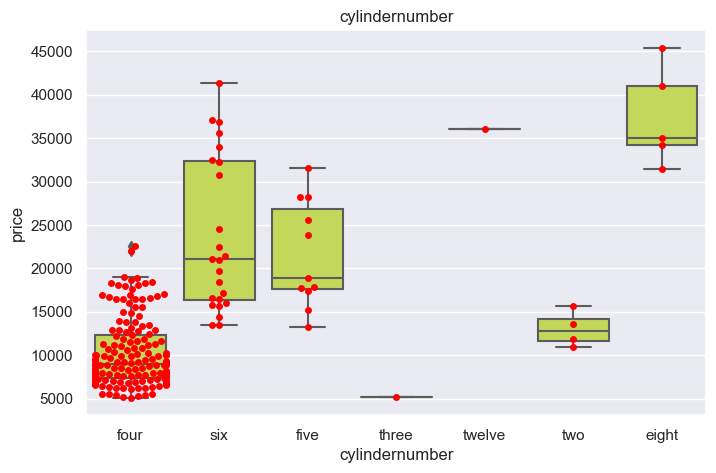

In [20]:
categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']


sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="price", data=raw_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="price", data=raw_data, color="red")
    plt.title(c)
    plt.show()

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [22]:
raw_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  Price prediction  
0          27  13495.0               NaN  
1          27  16500.0               NaN  
2          26  16500.0               NaN  
3          30  13950.0               NaN  
4          22  17450.0               NaN

In [23]:
new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548           four         130       3.47   
1      64.1       48.8        2548           four         130       3.47   
2      65.5       52.4        2823            six         152       2.68   
3      66.2       54.3        2337           four         109       3.19   
4      66.4       54.3        2824           five         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  Price prediction  carbody_convertible  carbody_hardtop  \
0  13495.0               NaN                    1                0   
1  16500.0               NaN                    1                0   
2  16500.0               NaN                    0                0   
3  13950.0               NaN                    0                0   
4  17450.0               NaN                    0                0   

   carbody_hatchback  carbody_sedan  carbody_wagon  aspiration_std  \
0                  0              0              0               1   
1                  0              0              0               1   
2                  1              0              0               1   
3                  0              1              0               1   
4                  0              1              0               1   

   aspiration_turbo  doornumber_four  doornumber_two  drivewheel_4wd  \
0                 0                0               1               0   
1                 0                0               1               0   
2                 0                0               1               0   
3                 0                1               0               0   
4                 0                1               0               1   

   drivewheel_fwd  drivewheel_rwd  enginelocation_front  enginelocation_rear  \
0               0               1                     1                    0   
1               0               1                     1                    0   
2               0               1                     1                    0   
3               1               0                     1                    0   
4               0               0                     1                    0   

   fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   
1               0                1                0                0   
2               0                1                0                0   
3               0                1                0                0   
4               0                1                0                0   

   enginetype_dohc  enginetype_dohcv  enginetype_l  

In [24]:
new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\735787984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\735787984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\735787984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
Price prediction        float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelo

In [25]:
new_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548               4         130       3.47   
1      64.1       48.8        2548               4         130       3.47   
2      65.5       52.4        2823               6         152       2.68   
3      66.2       54.3        2337               4         109       3.19   
4      66.4       54.3        2824               5         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  Price prediction  carbody_convertible  carbody_hardtop  \
0  13495.0               NaN                    1                0   
1  16500.0               NaN                    1                0   
2  16500.0               NaN                    0                0   
3  13950.0               NaN                    0                0   
4  17450.0               NaN                    0                0   

   carbody_hatchback  carbody_sedan  carbody_wagon  aspiration_std  \
0                  0              0              0               1   
1                  0              0              0               1   
2                  1              0              0               1   
3                  0              1              0               1   
4                  0              1              0               1   

   aspiration_turbo  doornumber_four  doornumber_two  drivewheel_4wd  \
0                 0                0               1               0   
1                 0                0               1               0   
2                 0                0               1               0   
3                 0                1               0               0   
4                 0                1               0               1   

   drivewheel_fwd  drivewheel_rwd  enginelocation_front  enginelocation_rear  \
0               0               1                     1                    0   
1               0               1                     1                    0   
2               0               1                     1                    0   
3               1               0                     1                    0   
4               0               0                     1                    0   

   fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   
1               0                1                0                0   
2               0                1                0                0   
3               0                1                0                0   
4               0                1                0                0   

   enginetype_dohc  enginetype_dohcv  enginety

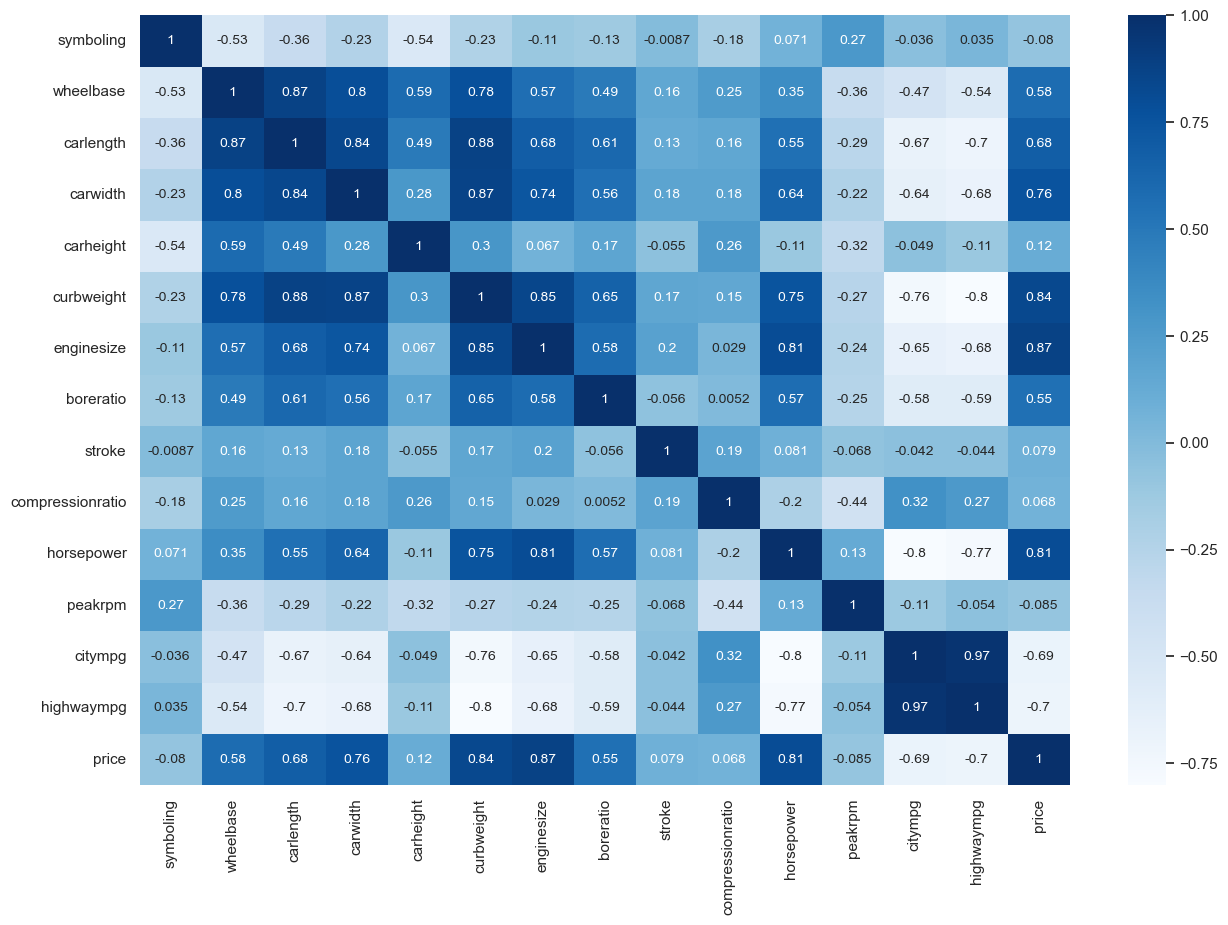

In [26]:
del new_raw_data['CarName']


sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [27]:
new_raw_data.dtypes

car_ID                    int64
symboling                 int64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
Price prediction        float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

In [28]:
X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 48)
(205,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(164, 48)
(41, 48)
(164,)
(41,)


In [48]:
new_raw_data.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0               4         130       3.47    2.68               9.0   
1               4         130       3.47    2.68               9.0   
2               6         152       2.68    3.47               9.0   
3               4         109       3.19    3.40              10.0   
4               5         136       3.19    3.40               8.0   

   horsepower  peakrpm  citympg  highwaympg    price  Price prediction  \
0         111     5000       21          27  13495.0               NaN   
1         111     5000       21          27  16500.0               NaN   
2         154     5000       19          26  16500.0               NaN   
3         102     5500       24          30  13950.0               NaN   
4         115     5500       18          22  17450.0               NaN   

   carbody_convertible  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0                    1                0                  0              0   
1                    1                0                  0              0   
2                    0                0                  1              0   
3                    0                0                  0              1   
4                    0                0                  0              1   

   carbody_wagon  aspiration_std  aspiration_turbo  doornumber_four  \
0              0               1                 0                0   
1              0               1                 0                0   
2              0               1                 0                0   
3              0               1                 0                1   
4              0               1                 0                1   

   doornumber_two  drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  \
0               1               0               0               1   
1               1               0               0               1   
2               1               0               0               1   
3               0               0               1               0   
4               0               1               0               0   

   enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0                     1                    0                0   
1                     1                    0                0   
2                     1                    0                0   
3                     1                    0                0   
4                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  \
0                 0           

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

reg = GradientBoostingRegressor(random_state=0)





(164, 48)
(41, 48)
(164,)
(41,)


In [67]:
y_train.shape

(164,)

In [71]:
X_train.shape

(164, 48)

C:\Users\manoj\AppData\Local\Temp\ipykernel_19848\3147158586.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

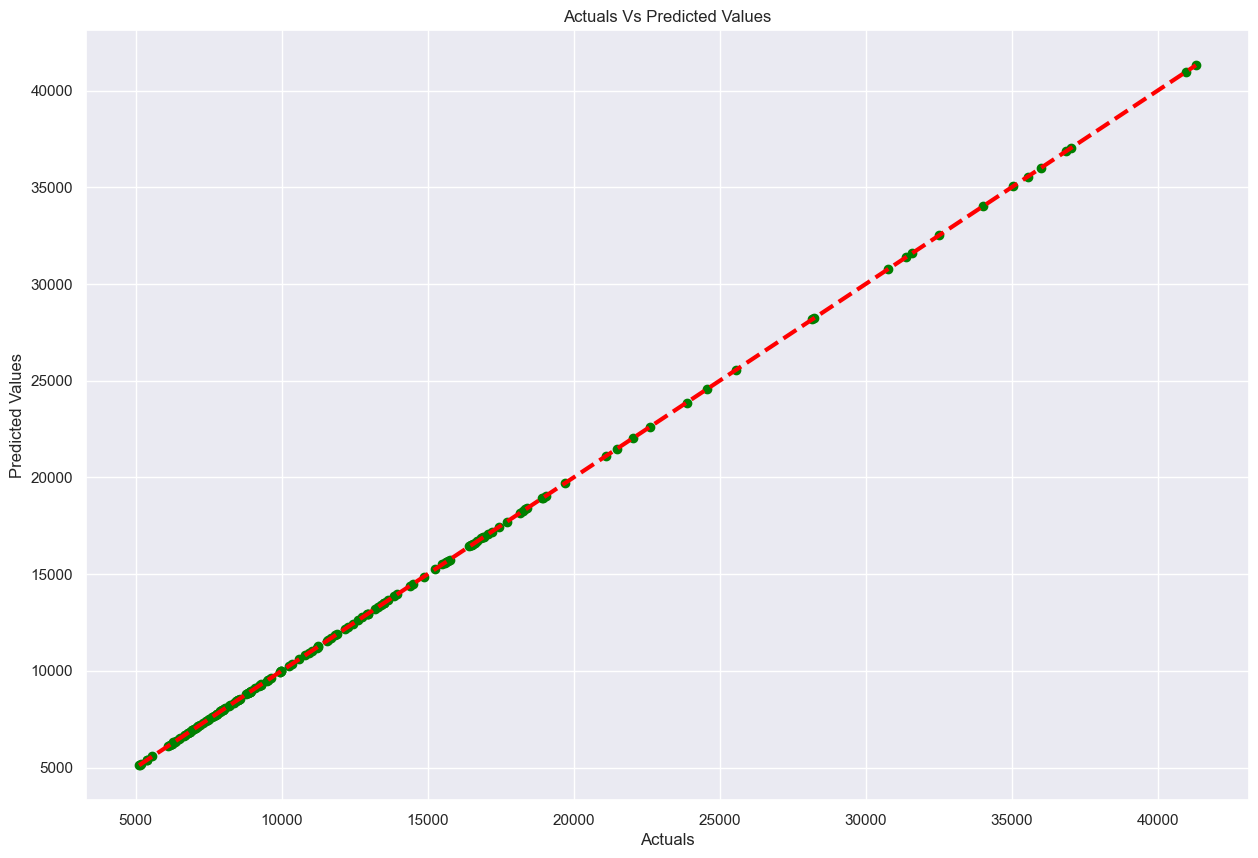

In [73]:
plt.figure(figsize=(15,10))

plt.scatter(y_train, y_train, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

In [74]:
X_train

array([[50.000000, 0.000000, 102.000000, ..., 0.000000, 0.000000,
        1.000000],
       [189.000000, 2.000000, 97.300000, ..., 0.000000, 0.000000,
        1.000000],
       [143.000000, 0.000000, 97.200000, ..., 0.000000, 0.000000,
        1.000000],
       ...,
       [134.000000, 2.000000, 99.100000, ..., 0.000000, 0.000000,
        1.000000],
       [141.000000, 2.000000, 93.300000, ..., 0.000000, 0.000000,
        1.000000],
       [201.000000, -1.000000, 109.100000, ..., 0.000000, 0.000000,
        1.000000]])

In [81]:
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_train
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = (y_train)
print(final_df2.shape)
final_df2

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

# Left Joining to the original dataset the predictions
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

(164, 51)
(41, 51)
(205, 51)


In [83]:
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_train
print(final_df.shape)

# Fixing the test df
final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = (y_train)
print(final_df2.shape)

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()


# Left Joining to the original dataset the predictions
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

final_df4 = raw_data.merge(final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
final_df4['CarName'] = final_df4['CarName'] + ' - ' + final_df4['car_ID'].astype(str)
print(final_df4.shape)
final_df4.head()

(164, 51)
(41, 51)
(205, 51)
(205, 29)


car_ID  symboling                       CarName fueltype aspiration  \
0       1          3        alfa-romero giulia - 1      gas        std   
1       2          3       alfa-romero stelvio - 2      gas        std   
2       3          1  alfa-romero Quadrifoglio - 3      gas        std   
3       4          2               audi 100 ls - 4      gas        std   
4       5          2                audi 100ls - 5      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0        two  convertible        rwd          front       88.6      168.8   
1        two  convertible        rwd          front       88.6      168.8   
2        two    hatchback        rwd          front       94.5      171.2   
3       four        sedan        fwd          front       99.8      176.6   
4       four        sedan        4wd          front       99.4      176.6   

   carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0      64.1       48.8        2548       dohc           four         130   
1      64.1       48.8        2548       dohc           four         130   
2      65.5       52.4        2823       ohcv            six         152   
3      66.2       54.3        2337        ohc           four         109   
4      66.4       54.3        2824        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  Price prediction            Phase  \
0       21          27  13495.0               NaN    Existing data   
1       21          27  16500.0               NaN    Existing data   
2       19          26  16500.0               NaN  New unseen data   
3       24          30  13950.0               NaN    Existing data   
4       18          22  17450.0               NaN    Existing data   

   Price Predictions  
0             7295.0  
1            15510.0  
2                NaN  
3                NaN  
4             7957.0

In [112]:
import pandas as pd

# reading the csv file
final_df4.to_csv('ExampleCsvFile', sep='\t')

# creating an output excel file
resultExcelFile = pd.ExcelWriter('ResultExcelFile.xlsx')

# converting the csv file to an excel file
final_df4.to_excel(resultExcelFile, index=True)

# saving the excel file
resultExcelFile.save()

# Reading and Converting the output/result excel file into a dataframe object
excelDataframe=pd.read_excel('ResultExcelFile.xlsx')

# Displaying the dataframe object
print(excelDataframe)

     Unnamed: 0  car_ID  symboling                       CarName fueltype  \
0             0       1          3        alfa-romero giulia - 1      gas   
1             1       2          3       alfa-romero stelvio - 2      gas   
2             2       3          1  alfa-romero Quadrifoglio - 3      gas   
3             3       4          2               audi 100 ls - 4      gas   
4             4       5          2                audi 100ls - 5      gas   
..          ...     ...        ...                           ...      ...   
200         200     201         -1         volvo 145e (sw) - 201      gas   
201         201     202         -1             volvo 144ea - 202      gas   
202         202     203         -1             volvo 244dl - 203      gas   
203         203     204         -1               volvo 246 - 204   diesel   
204         204     205         -1             volvo 264gl - 205      gas   

    aspiration doornumber      carbody drivewheel enginelocation  wheelbase